Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 +3*X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.56974225],
       [2.9642495 ]])

In [3]:

eta = 0.1
n_iterations = 1000
m = 100 

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.56974225],
       [2.9642495 ]])

In [4]:
X_new  = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.56974225],
       [10.49824124]])

(0.0, 2.0, 0.0, 15.0)

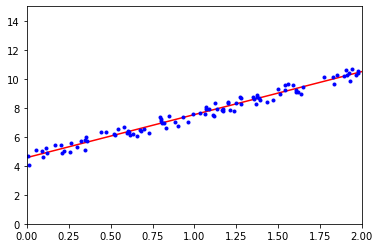

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y , "b.")
plt.axis([0,2,0,15])

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.56974225]), array([[2.9642495]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.56974225],
       [10.49824124]])

Gradient Descent step
θ next
step
= θ − η.∇θ.MSE(θ)

In [8]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta 

array([[4.56974225],
       [2.9642495 ]])

# Stochastic Gradient Descent

In [9]:
n_epochs = 50
t0,t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index +1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.5520297 ],
       [2.97187092]])

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50,penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [11]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.53705112]), array([2.97419375]))

Polynomial Regression

First, let’s generate some nonlinear data, based on a simple
quadratic equation 9

In [12]:
m = 100 
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)


In [13]:
X

array([[-2.72545834],
       [ 0.00615153],
       [-0.30134983],
       [-0.09303774],
       [ 1.83083879],
       [ 2.43792798],
       [-0.5109053 ],
       [-1.20443447],
       [-2.95384388],
       [-0.68086489],
       [ 2.17694137],
       [ 2.52412401],
       [-2.67368722],
       [ 0.78665205],
       [-0.85435878],
       [ 2.35884778],
       [ 1.38442626],
       [ 0.48703388],
       [-0.14962081],
       [-1.77278239],
       [ 2.92953725],
       [-1.02726879],
       [ 0.75125274],
       [ 0.65790522],
       [-1.78401971],
       [-1.14000112],
       [-1.55710369],
       [-2.83140266],
       [-1.92909704],
       [-1.3371255 ],
       [ 1.03060244],
       [ 1.77307401],
       [-0.92913105],
       [-1.99836323],
       [-1.7885276 ],
       [-2.97851749],
       [ 2.40366036],
       [-1.46941812],
       [-1.81115536],
       [ 2.72406416],
       [ 2.46786026],
       [ 1.80466794],
       [ 0.08220911],
       [ 1.65471685],
       [ 1.34402056],
       [-1

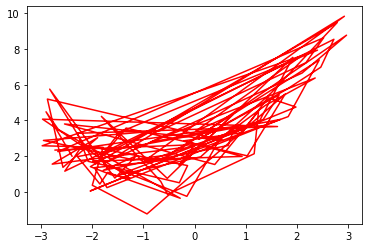

In [14]:
plt.plot(X,y,'r-')

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.72545834])

In [16]:
X_poly[0]

array([-2.72545834,  7.42812318])

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.83069945]), array([[1.04427061, 0.53905022]]))

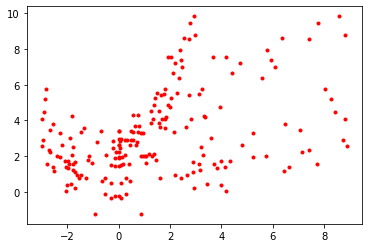

In [18]:
plt.plot(X_poly, y, 'r.')

# Learning Curves

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
        

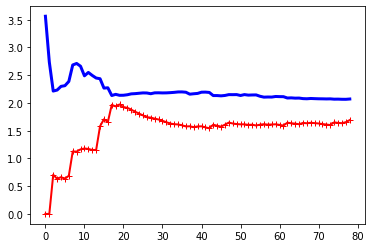

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

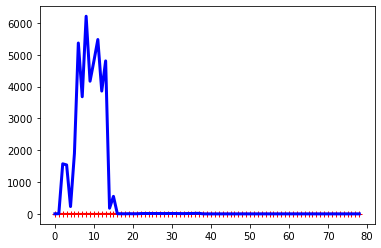

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)

# REGULARIZED LINEAR MODELS


# RIDGE REGRESSION

Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin‐
ear Regression: a regularization term equal to α∑(i = 1 to n) θi**2 is added to the cost function.

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

using closed form solution

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.82001885]])

In [23]:
#using stochastic gradient descent algorithm

In [24]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.76760139])

The penalty hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the l 2 norm of the weight vector: this is simply Ridge
Regression.

# Lasso Regression

###### Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the l 1 norm
of the weight vector instead of half the square of the l 2 norm

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.76548481])

# Elastic Net

elastic Net is a middle ground between Ridge Regression and Lasso Regression.

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.76993682])

# Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping

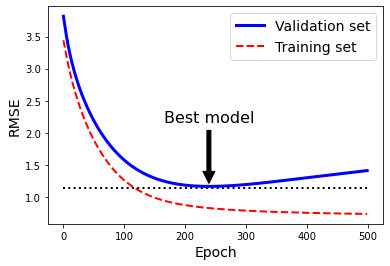

In [34]:
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from __future__ import division, print_function, unicode_literals
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

# LOGISTIC REGRESSION

In [35]:
#IRIS FLOWER CLASSIFICATION

In [36]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [38]:
X = iris["data"][:,3:]  #petal width
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [39]:
y = (iris["target"]==2).astype(np.int)     #1 if iris-virgica else 0

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

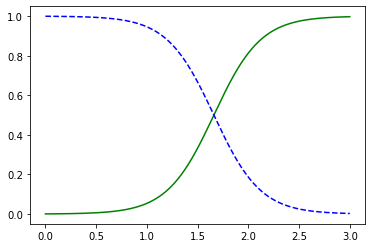

In [45]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label ="Not Iris-Virginca")
plt.show()

/home/bshesh/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


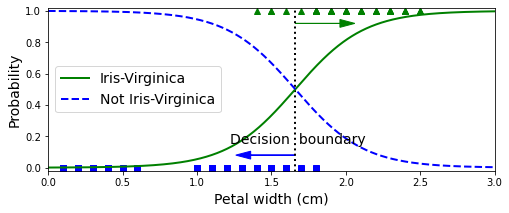

In [47]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()



In [49]:
decision_boundary

array([1.66066066])

In [50]:
log_reg.predict([[1.7],[1.5]])


array([1, 0])

The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C . The higher the value of C , the less the model is regularized.

Just like the other linear models, Logistic Regression models can be regularized using l1 or l2 penalties. Scitkit-Learn actually adds an l 2 penalty by default.

In [52]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [53]:
softmax_reg.predict([[5,2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])